In [1]:
import pandas as pd # for numerical operations
import numpy as np # to create data structures
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import math # for mathamaticals operations
from matplotlib import pyplot 
from numpy import mean # for finding mean values
from numpy import std # for finding standard deviation 
import warnings # To remove warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler # for scaling the data to make in one range
from sklearn.linear_model import LinearRegression # for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor # for model building
from sklearn.model_selection import train_test_split # for splitting the data into train and test set
from sklearn.metrics import mean_absolute_error # for evaluating model
from sklearn.metrics import mean_squared_error # for evaluating model
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
from sklearn.neighbors import KNeighborsClassifier # for model building
from sklearn.metrics import confusion_matrix # for evaluating  the model
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score # for evaluating the model
from sklearn.preprocessing import StandardScaler # for standardize features by removing the mean and scalling to unit variance
from  sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.datasets import make_blobs # used to generate blobs of point with Gaussian distribution
from sklearn.cluster import KMeans # K-Means Algorithm to cluster the data
from sklearn.cluster import AgglomerativeClustering 
from sklearn import metrics
from sklearn.datasets import make_circles # making circles 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score # Finding optimum value of K and cluster efficiency
from sklearn.cluster import DBSCAN # fitting the DBSCAN to the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors#Evaluate the optimum values of Hyperparameters
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error,mean_squared_error
from ipywidgets import interact

In [2]:
#Loading data file
mall_data=pd.read_csv("C:/Users/Saud Shaikh/Downloads/DS3_C6_S3_MallCustomers_Data_Project.csv")

# Exploring The Data

In [3]:
#Preview the data file
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#getting dataset Info
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Describing the data
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#Shape of the dataset
mall_data.shape

(200, 5)

In [7]:
#getting columns of dataset
mall_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
#Missing Values 
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We find that there is no missing value exist in this dataset,so we skip the missing value treatment

# Setting the index 

In [9]:
mall_data=mall_data.set_index('CustomerID')
mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# Categorizing the Data 

In [10]:
cat=[]
con=[]

for i in mall_data.columns:
    if mall_data[i].nunique()<50:
        cat.append(i)
    else:
        con.append(i)

print(tabulate({"Categorical":cat,"Continuous": con}, headers = ["categorical", "continuous"]))           

categorical    continuous
-------------  ----------------------
Gender         Age
               Annual Income (k$)
               Spending Score (1-100)


# Non-Unique value in data set

In [11]:
for i in mall_data.columns:
    print(i,':-',mall_data[i].nunique())

Gender :- 2
Age :- 51
Annual Income (k$) :- 64
Spending Score (1-100) :- 84


# Unique value in data set

In [12]:
for i in mall_data.columns:
    if mall_data[i].nunique()<50:
        print(i,':-',mall_data[i].unique())

Gender :- ['Male' 'Female']


# EDA

## Visualizing Categorical Data 

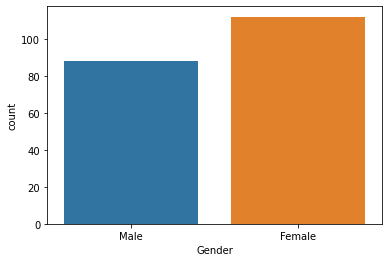

In [13]:
sns.countplot(data=mall_data,x='Gender');

# Visualizing Continous Data

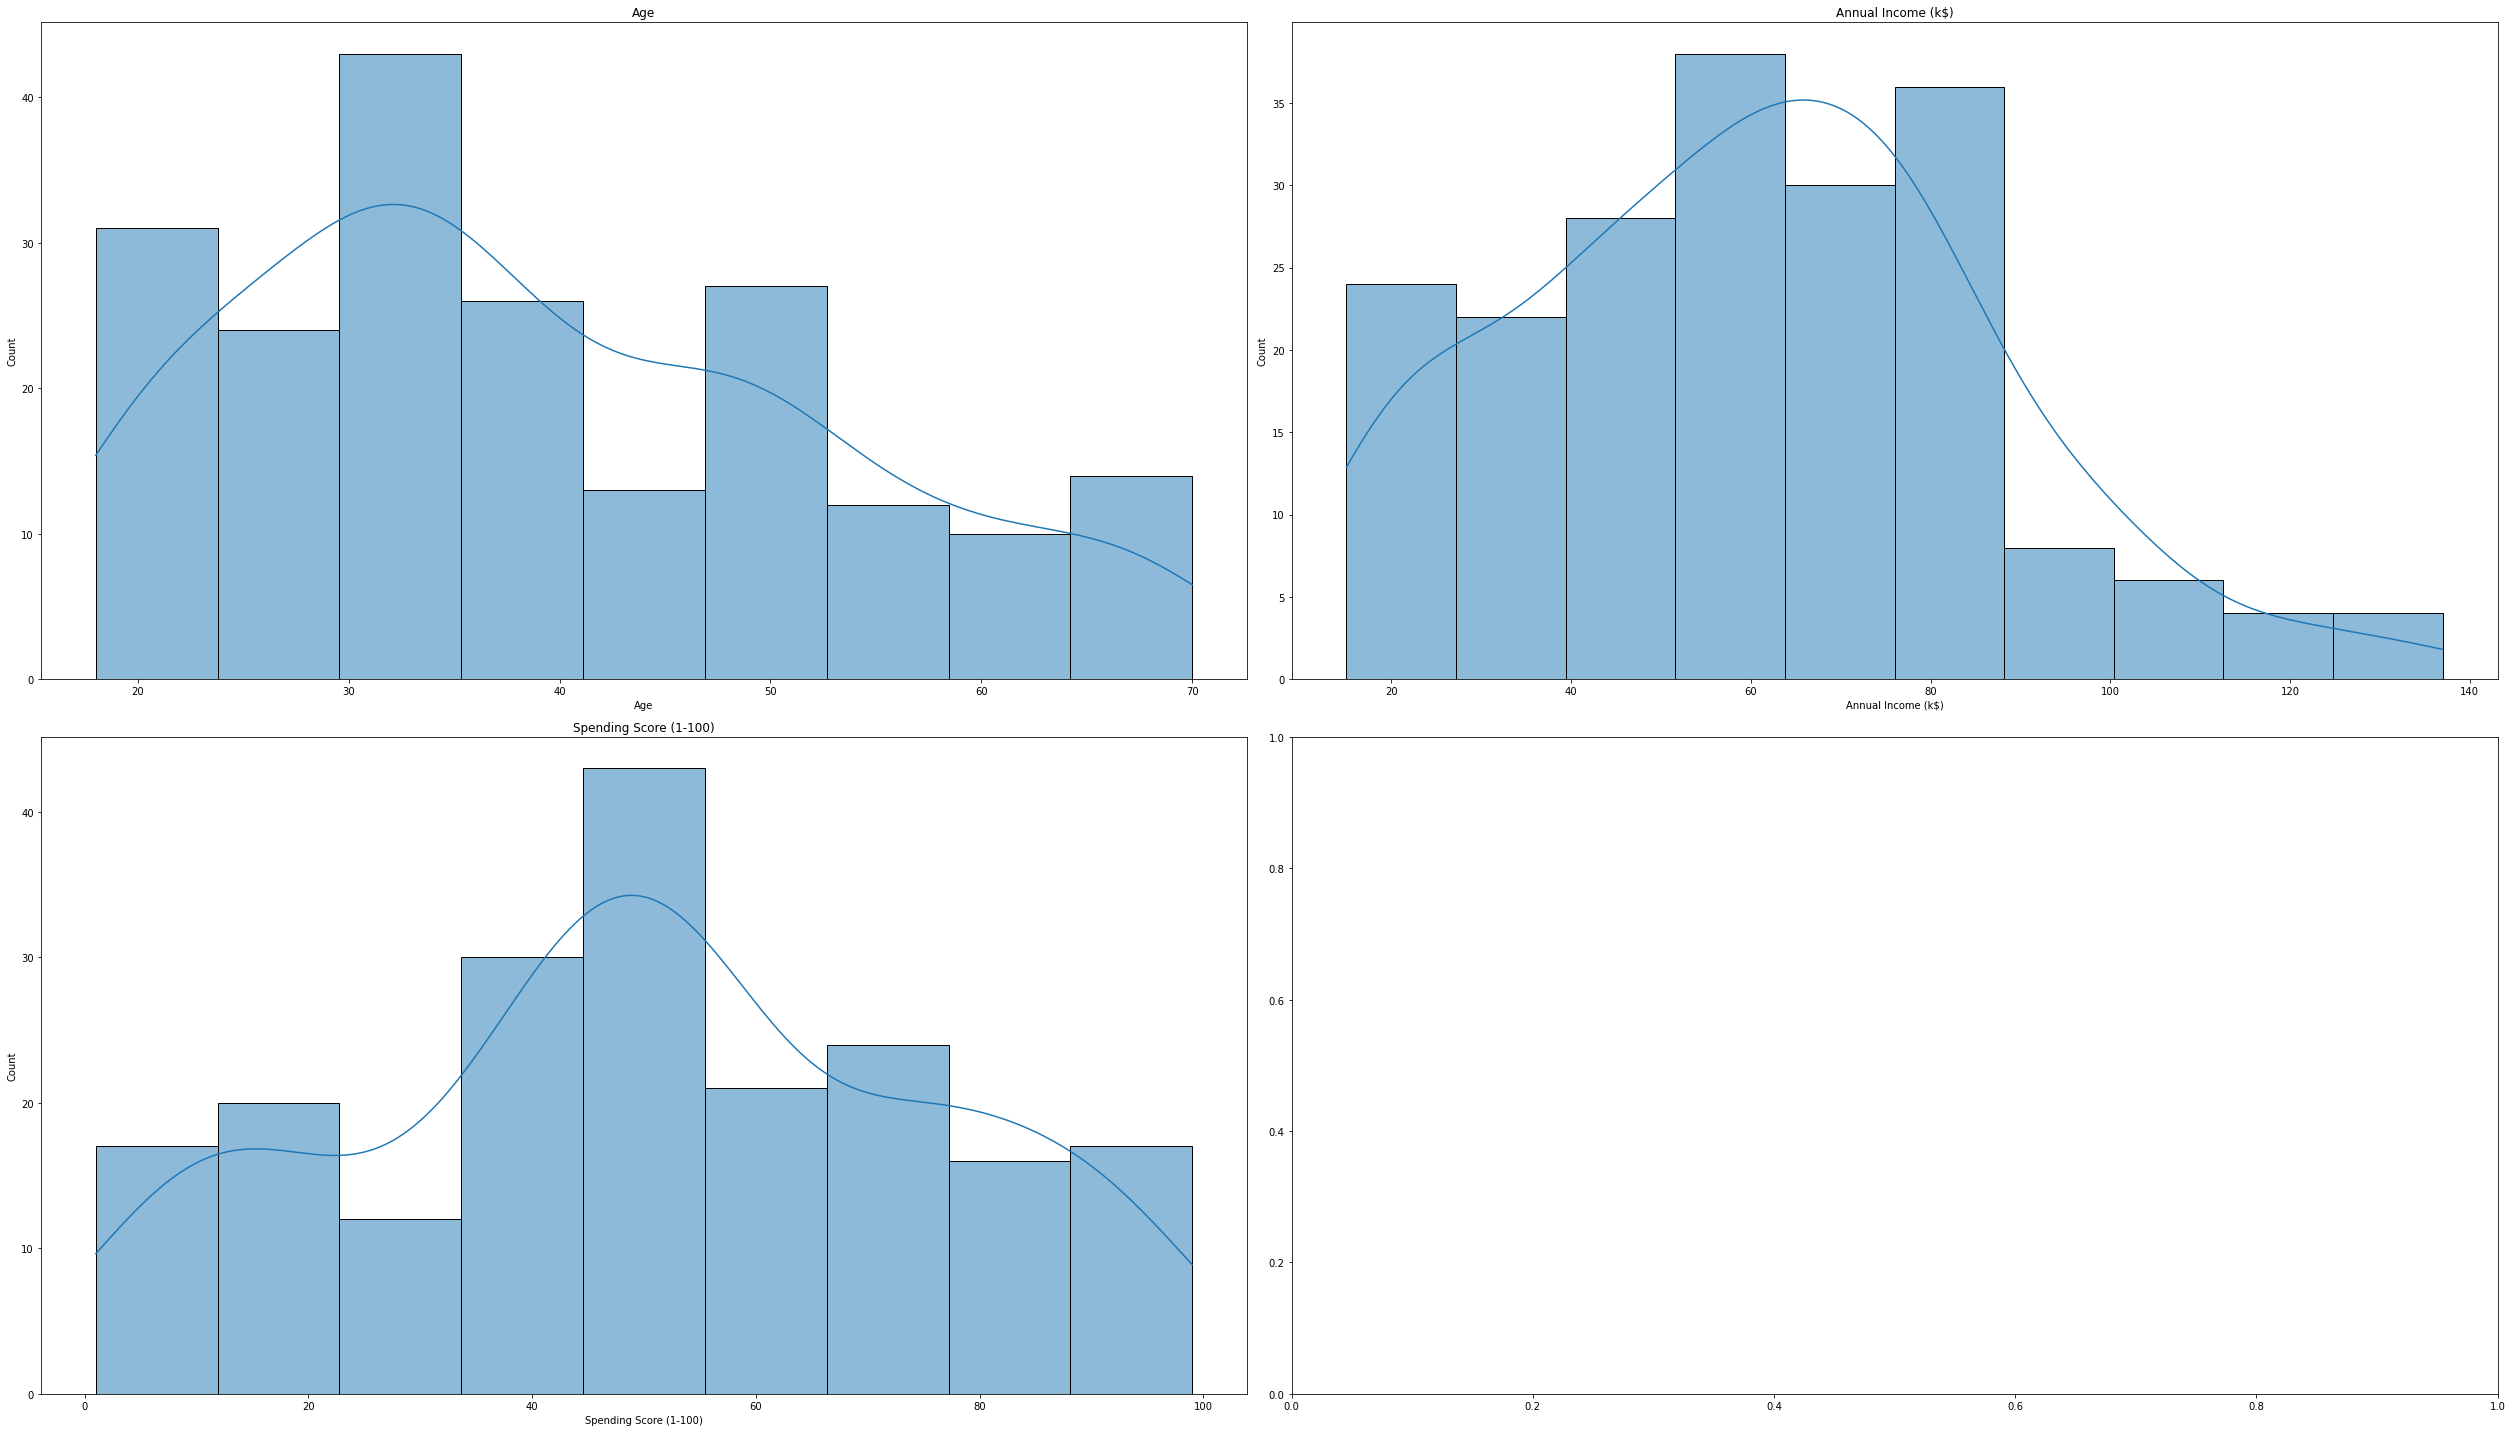

In [14]:
r=2
c=2
figs,axes =plt.subplots(c,r,figsize=(35,20),tight_layout=True)
for i , ax in zip(con,axes.flatten()[:len(con)]):
    sns.histplot(data=mall_data,x=mall_data[i].values,palette='magma',ax=ax,kde=True)
    ax.set_xlabel(i)
    ax.set_title(i)
plt.show()  

## Interactive Univariate Analysis of Categorical Variables

In [15]:
def cat_info(col): 
    print(f"Unique values in {mall_data.columns[col]} are: {mall_data.iloc[:,col].unique()}") 
    print(f"Mode of {mall_data.columns[col]} is {mall_data.iloc[:,col].mode()[0]}") 
    print(f"Number of missing values in {mall_data.columns[col]} is {mall_data.iloc[:,col].isnull().sum()}") 
    if mall_data.iloc[:,col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {mall_data.columns[col]} column")

In [16]:
def cat_info(col): 
    print(f"Unique values in {col} are: {mall_data[col].unique()}") 
    print(f"Mode of {col} is {mall_data[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {mall_data[col].isnull().sum()}") 
    if mall_data[col].isnull().sum() > 0: 
        print(f"\nThere are null values in the {col} column")

# Analysis of Gender`

In [17]:
cat_info('Gender')

Unique values in Gender are: ['Male' 'Female']
Mode of Gender is Female
Number of missing values in Gender is 0


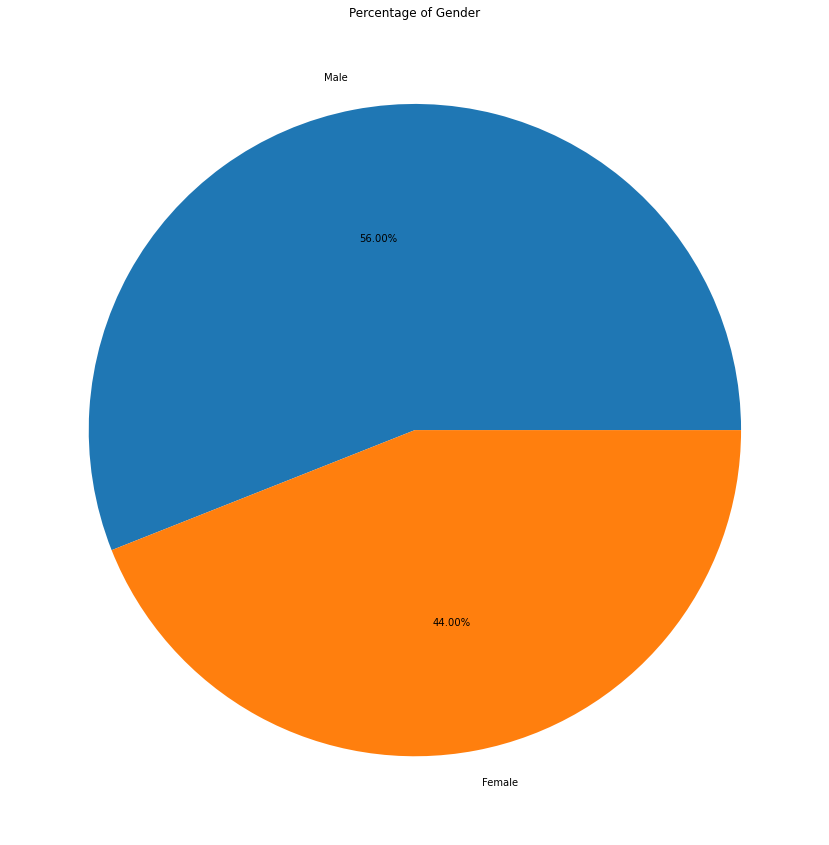

In [18]:
plt.figure(figsize=(30,15))
plt.title('Percentage of Gender')
plt.pie(mall_data['Gender'].value_counts(),labels=mall_data['Gender'].unique(),autopct='%0.2f%%');

## Univariate Analysis of Numerical(Continuous) Variables

In [19]:
mall_data1=mall_data[con]
def con_vis(col,palette='magma'):
    num_info(col)
    figs,axes = plt.subplots(1,2,figsize=(30,15))
    sns.boxplot(data=mall_data1,x=mall_data1.iloc[:,col],palette=palette,ax=axes[0])
    sns.histplot(data=mall_data1,x=mall_data1.iloc[:,col],palette=palette,ax=axes[1],kde=True)
    plt.title(mall_data1.columns[col])
    plt.show()
interact(con_vis,col=(0,len(mall_data1.columns)-1,1),palette=['magma','viridis'],columns=[cat])   

interactive(children=(IntSlider(value=1, description='col', max=2), Dropdown(description='palette', options=('…

<function __main__.con_vis(col, palette='magma')>

In [20]:
def num_info(col):
    print(f"mean of {col} is {mall_data[col].mean()}")
    print(f"median of {col} is {mall_data[col].median()}")
    print(f"mode of {col} is {mall_data[col].mode()[0]}")
    print(f"standard deviation of {col} is {mall_data[col].std()}")
    print(f"number of missing values of {col} is {mall_data[col].isnull().sum()}")

In [21]:
num_info('Age')

mean of Age is 38.85
median of Age is 36.0
mode of Age is 32
standard deviation of Age is 13.969007331558883
number of missing values of Age is 0


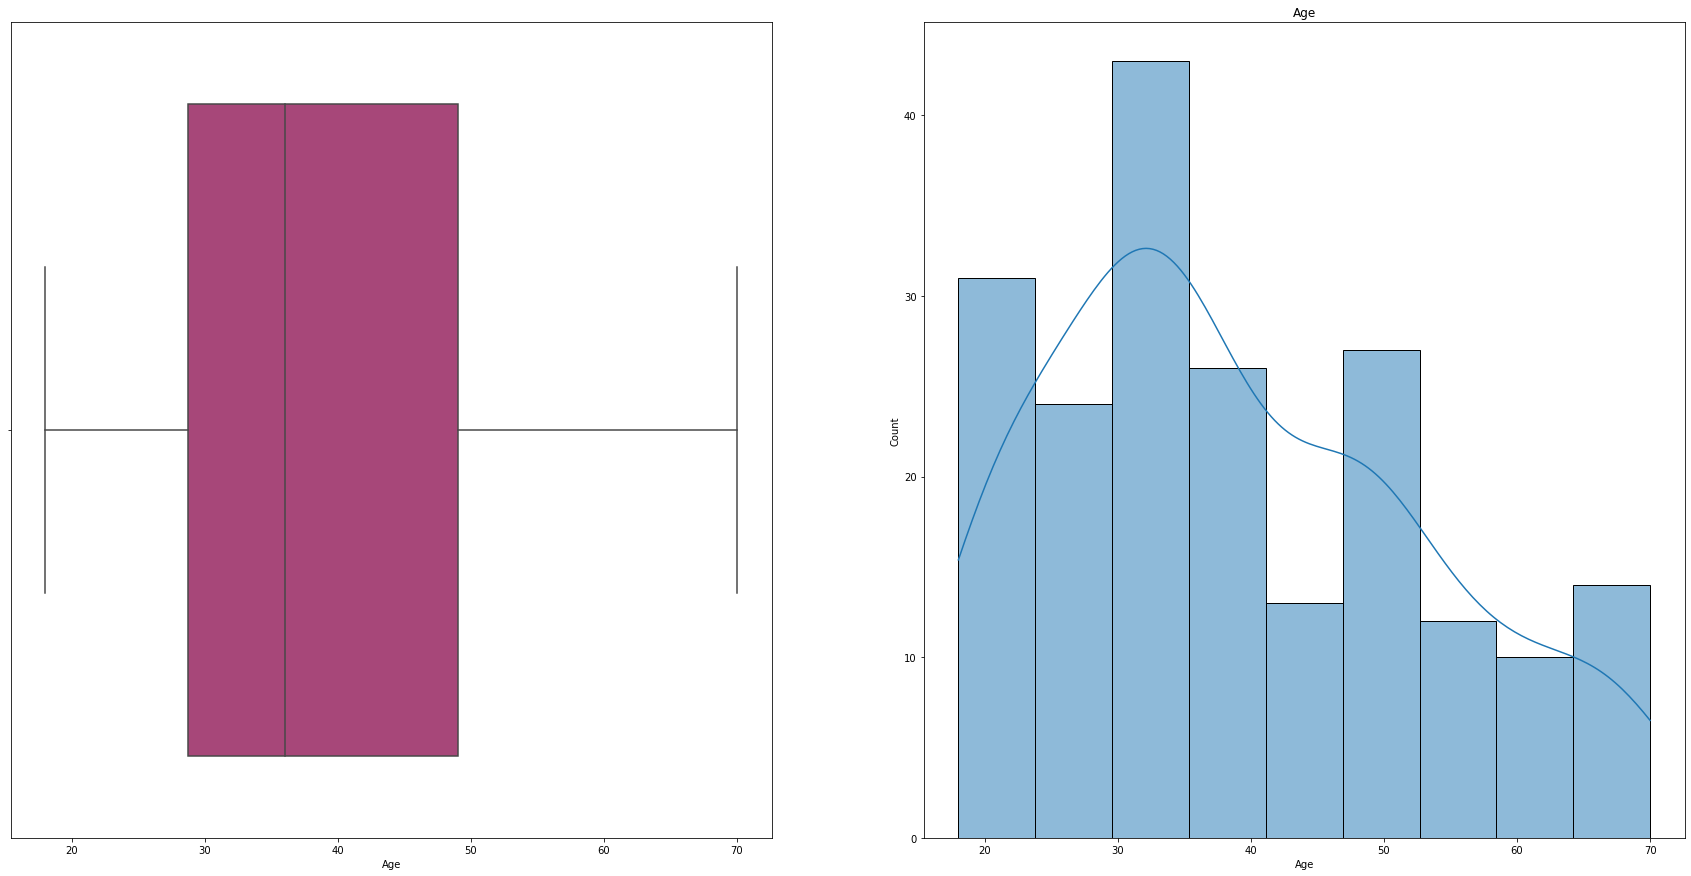

In [22]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.boxplot(data=mall_data,x=mall_data['Age'],palette='magma',ax=axes[0])
sns.histplot(data=mall_data,x=mall_data['Age'],palette='magma',ax=axes[1],kde=True)
plt.title('Age')
plt.show()

In [23]:
num_info('Annual Income (k$)')

mean of Annual Income (k$) is 60.56
median of Annual Income (k$) is 61.5
mode of Annual Income (k$) is 54
standard deviation of Annual Income (k$) is 26.264721165271254
number of missing values of Annual Income (k$) is 0


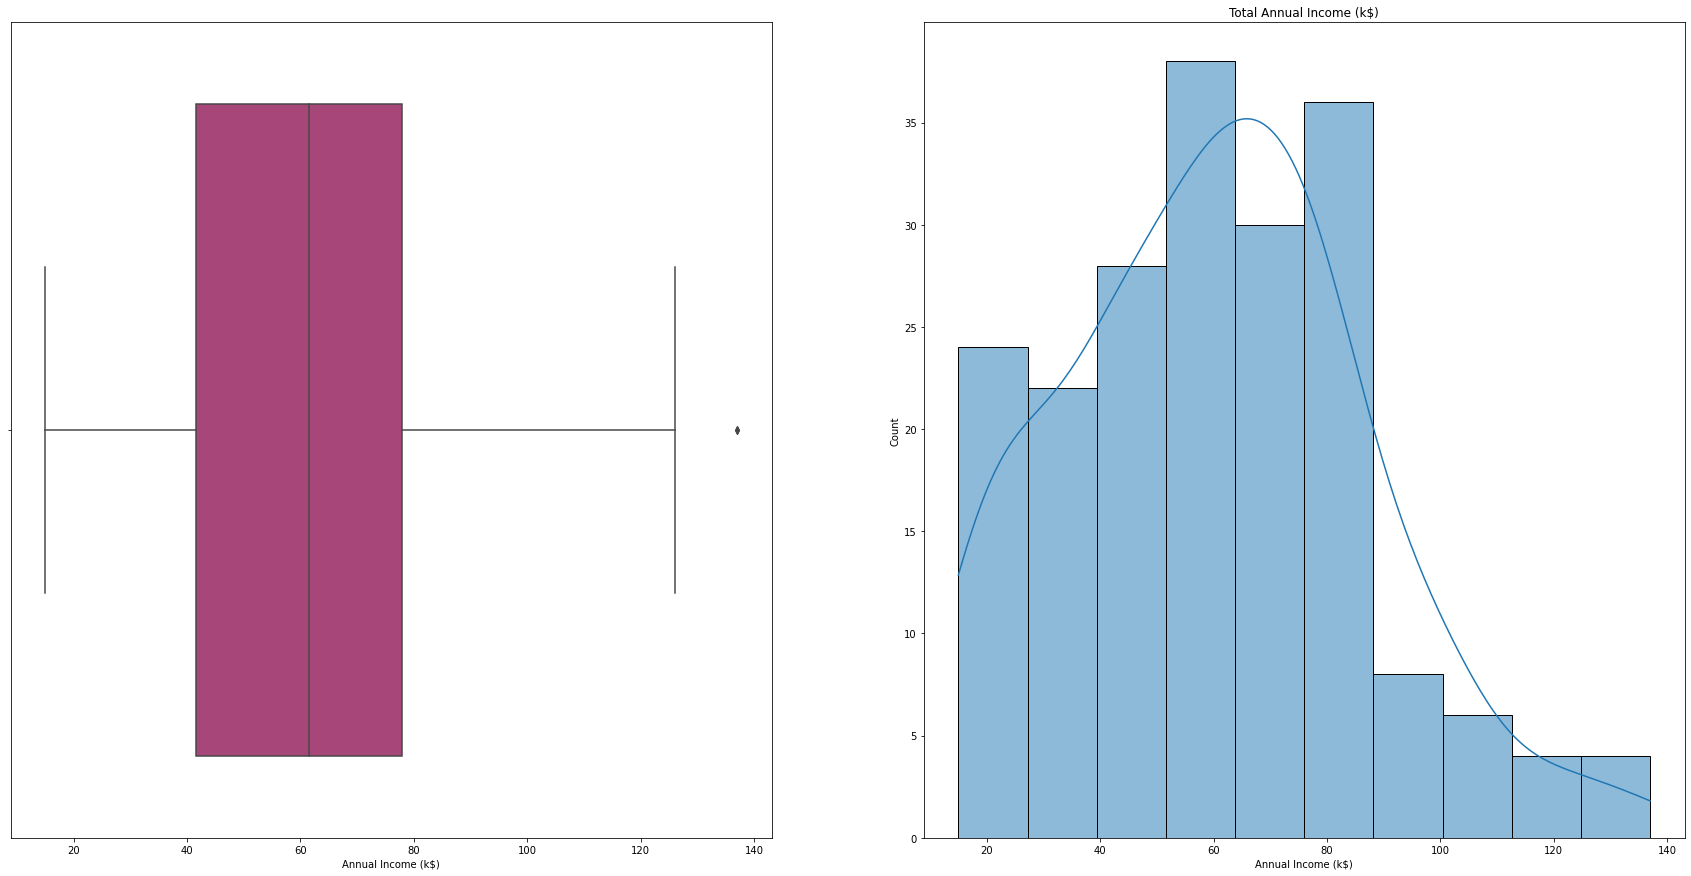

In [24]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.boxplot(data=mall_data,x=mall_data['Annual Income (k$)'],palette='magma',ax=axes[0])
sns.histplot(data=mall_data,x=mall_data['Annual Income (k$)'],palette='magma',ax=axes[1],kde=True)
plt.title('Total Annual Income (k$)')
plt.show()

In [25]:
num_info('Spending Score (1-100)')

mean of Spending Score (1-100) is 50.2
median of Spending Score (1-100) is 50.0
mode of Spending Score (1-100) is 42
standard deviation of Spending Score (1-100) is 25.823521668370162
number of missing values of Spending Score (1-100) is 0


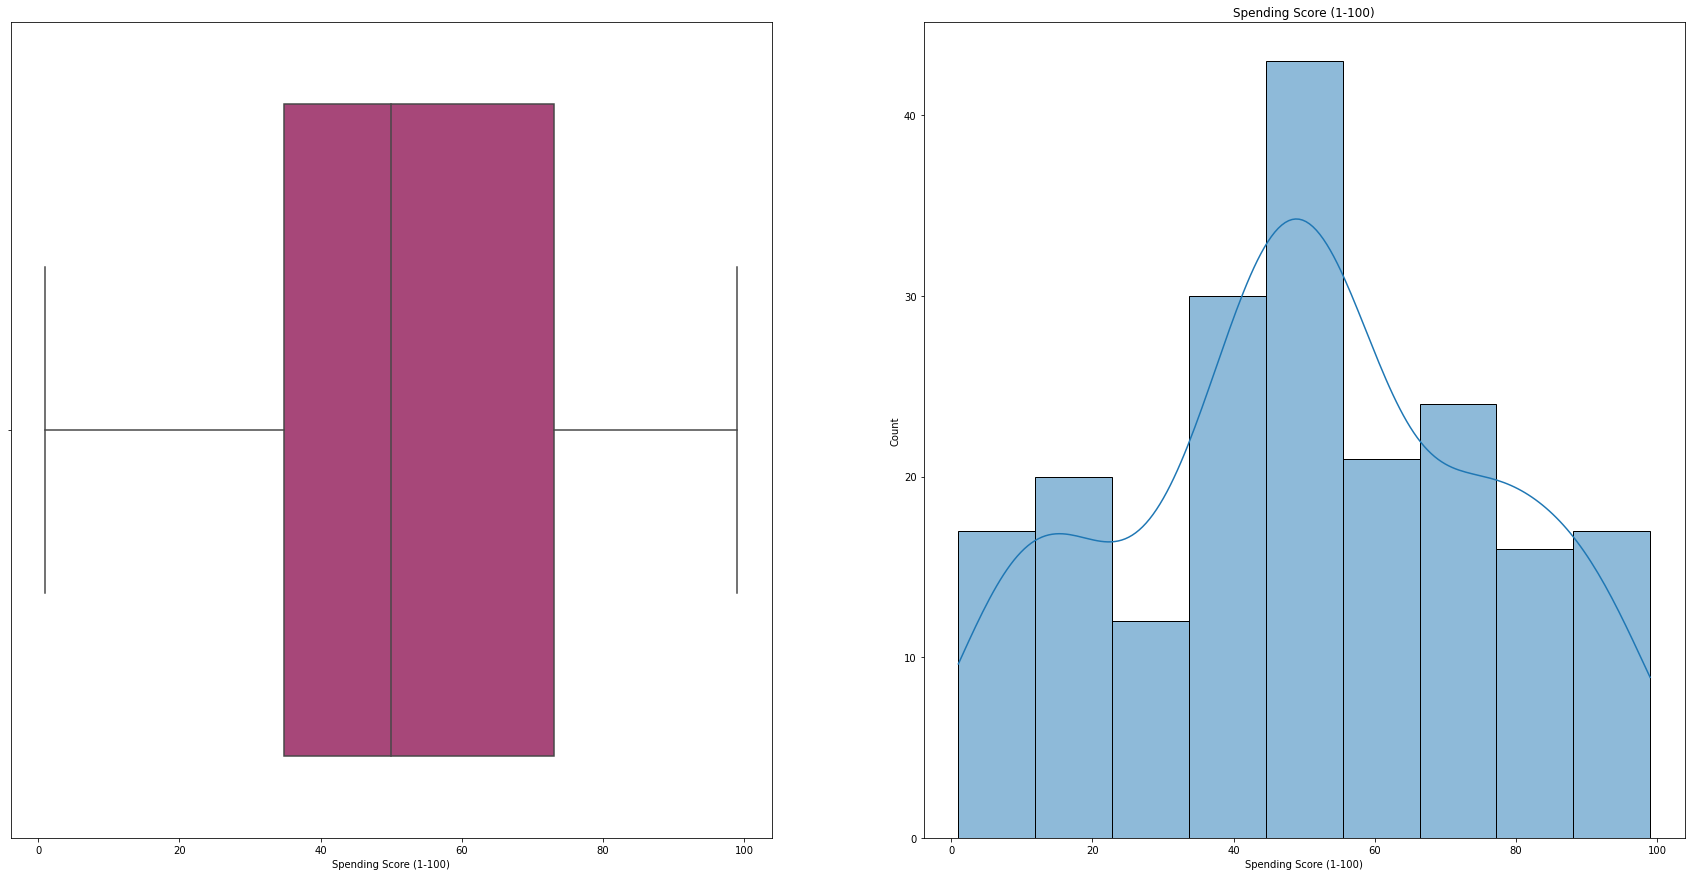

In [26]:
figs,axes = plt.subplots(1,2,figsize=(30,15))
sns.boxplot(data=mall_data,x=mall_data['Spending Score (1-100)'],palette='magma',ax=axes[0])
sns.histplot(data=mall_data,x=mall_data['Spending Score (1-100)'],palette='magma',ax=axes[1],kde=True)
plt.title('Spending Score (1-100)')
plt.show()

# Bivariate Analysis of variables

# Age VS Spending Score (1-100)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

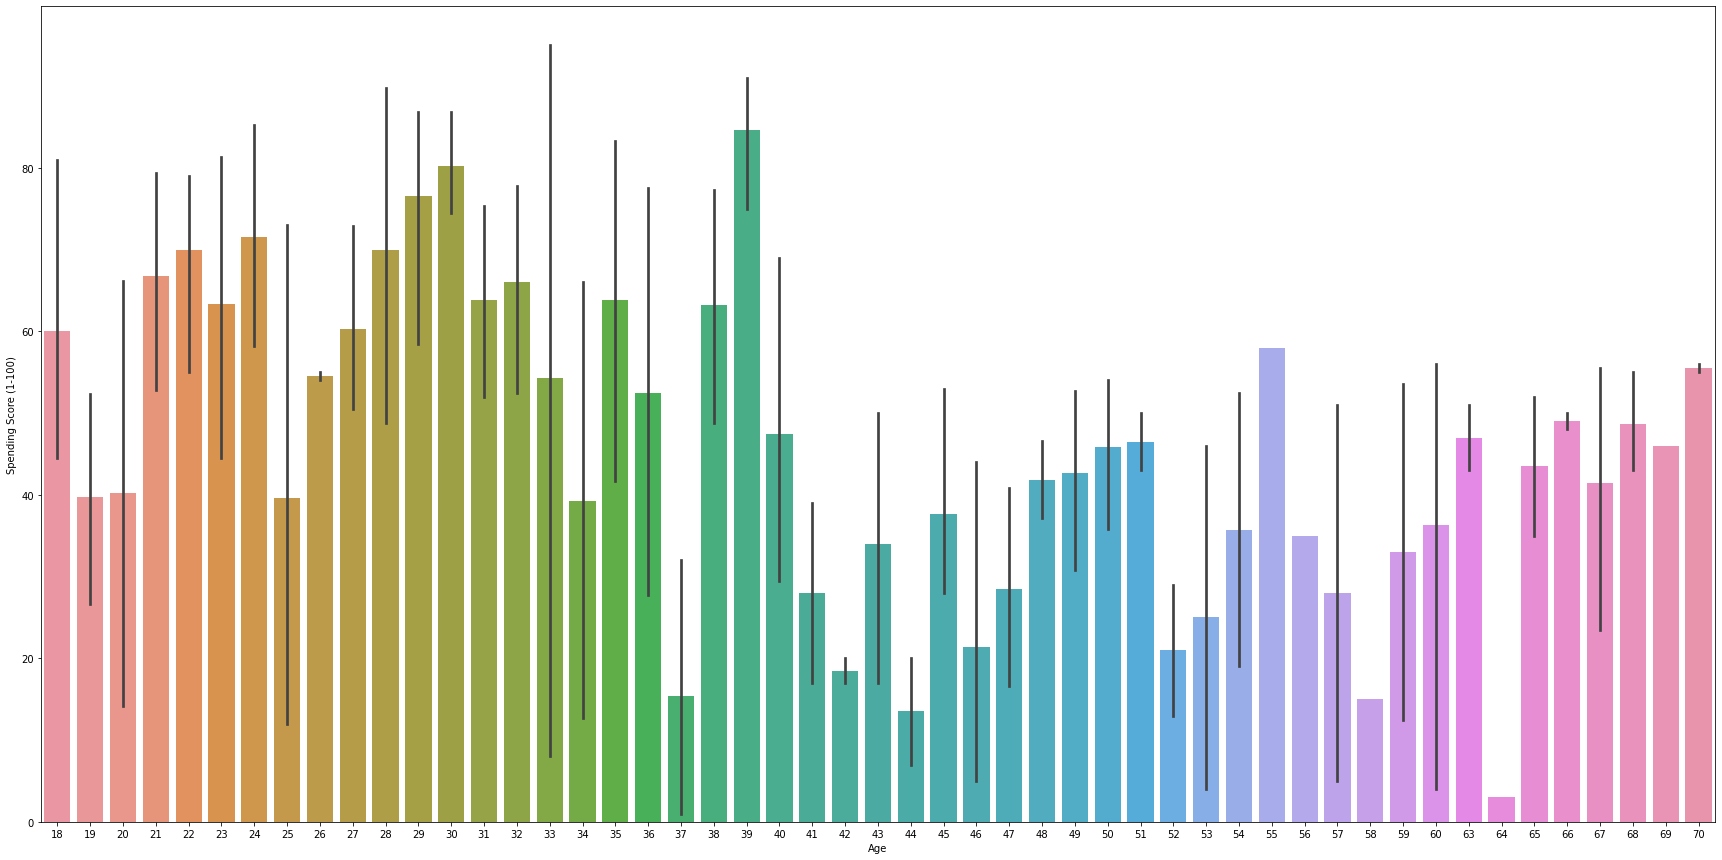

In [27]:
plt.figure(figsize=(30,15))
sns.barplot(data=mall_data,x=mall_data['Age'],y=mall_data['Spending Score (1-100)'])

# Age VS Annual Income (k)

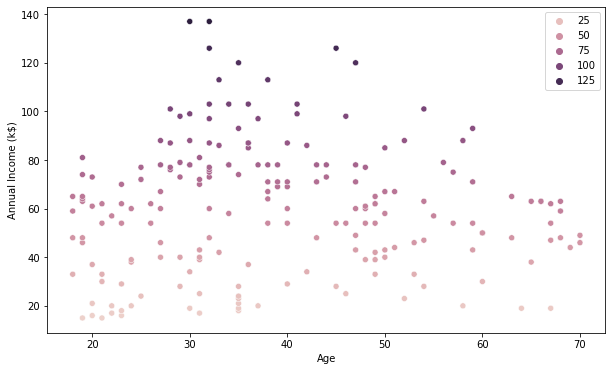

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=mall_data,x=mall_data['Age'],y=mall_data['Annual Income (k$)'],hue='Annual Income (k$)')
plt.legend()
plt.show()

# Age VS Gender 

<AxesSubplot:xlabel='Age', ylabel='Count'>

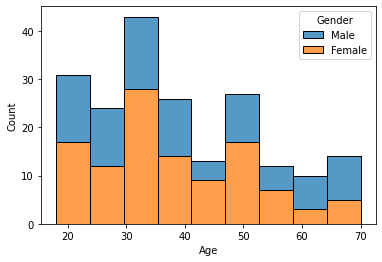

In [29]:
sns.histplot(data=mall_data,x='Age',hue='Gender',multiple='stack')

## Spending score | Annual Income | Gender 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1440x432 with 0 Axes>

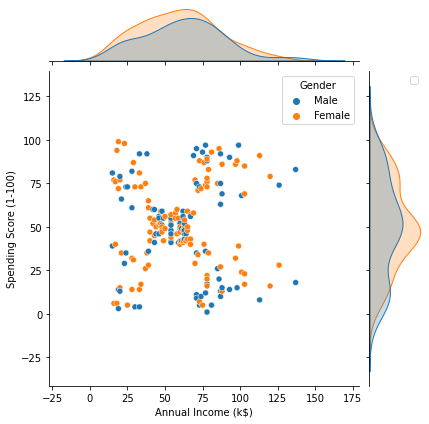

In [30]:
plt.figure(figsize = (20, 6))
sns.jointplot(data=mall_data,y='Spending Score (1-100)',x="Annual Income (k$)",hue='Gender')
plt.legend()

# Age | Spending Score | Gender

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1440x432 with 0 Axes>

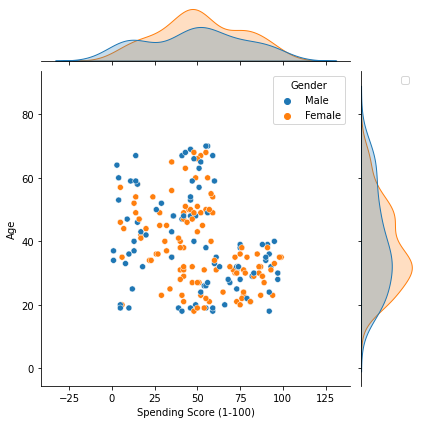

In [31]:
plt.figure(figsize = (20, 6))
sns.jointplot(data=mall_data,y='Age',x="Spending Score (1-100)",hue='Gender')
plt.legend()

# Age | Annual Income  | Gender

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1440x432 with 0 Axes>

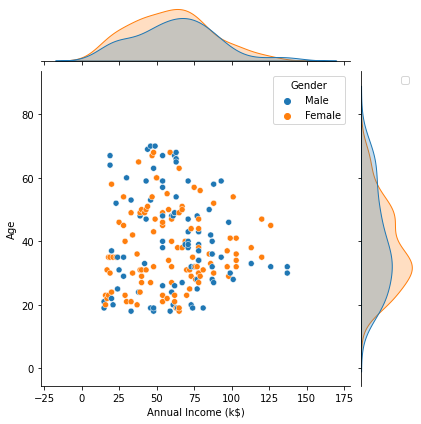

In [32]:
plt.figure(figsize = (20, 6))
sns.jointplot(data=mall_data,y='Age',x="Annual Income (k$)",hue='Gender')
plt.legend()

# Pairplot

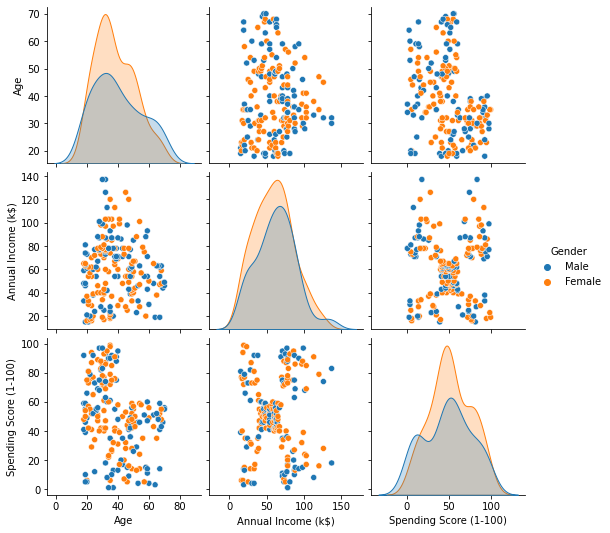

In [33]:
sns.pairplot(data=mall_data,hue='Gender')

# Correlation 

In [34]:
corr=mall_data.corr()
corr

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# Heatmap

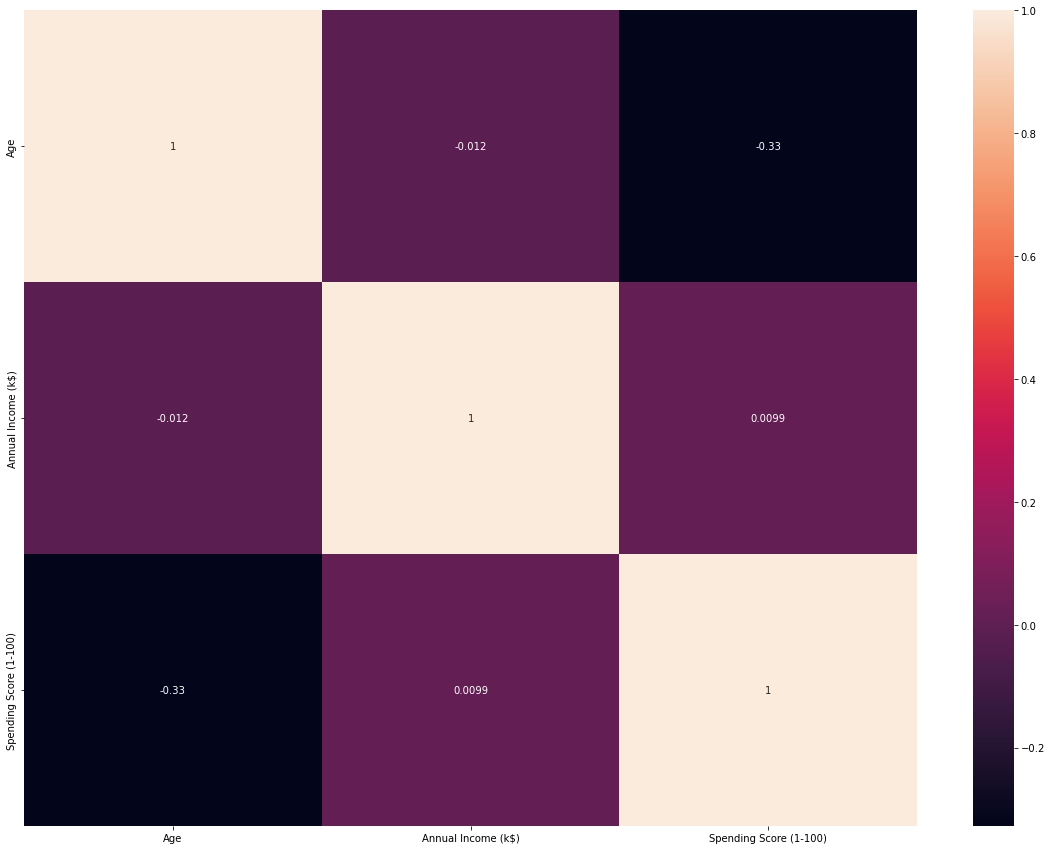

In [35]:
plt.figure(figsize=(20, 15))
sns.heatmap(mall_data.corr(),annot=True)
plt.show()

# Preprocessing

# Feature Scaling

In [36]:
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_sales_df_c = mall_data.select_dtypes(include='number')
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_sales_df_c.to_numpy()),columns=new_sales_df_c.columns)
    return df_scaled

In [37]:
scale ='minmax'
df_scaled=feature_scale(scale)
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


# Label Encoding

In [38]:
label=LabelEncoder()

In [39]:
mall_data['Gender']=label.fit_transform(mall_data['Gender'])
mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


## Test | Train Split 

In [40]:
X=mall_data.iloc[:,[2,3]]
X.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


# Data Scaling

In [41]:
scaler= StandardScaler()
X2=X.copy()
X1=scaler.fit_transform(X)
X=pd.DataFrame(X1, columns=X2.columns)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# KMeans

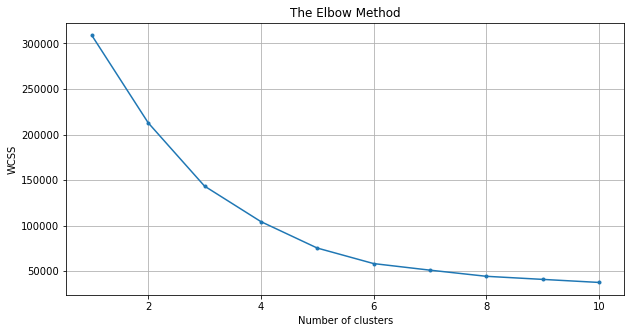

In [42]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=100, random_state=0)
    kmeans.fit(mall_data)
    wcss.append(kmeans.inertia_)
fig=plt.figure(figsize=(10,5))
#fig.set_size_inches(18, 7)
plt.plot(range(1,11),wcss,marker='.')
plt.title('The Elbow Method')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.33340205479521
For n_clusters = 3 The average silhouette_score is : 0.4514909309424474
For n_clusters = 4 The average silhouette_score is : 0.49620078745146784
For n_clusters = 5 The average silhouette_score is : 0.5594854531227246
For n_clusters = 6 The average silhouette_score is : 0.5354954062577636


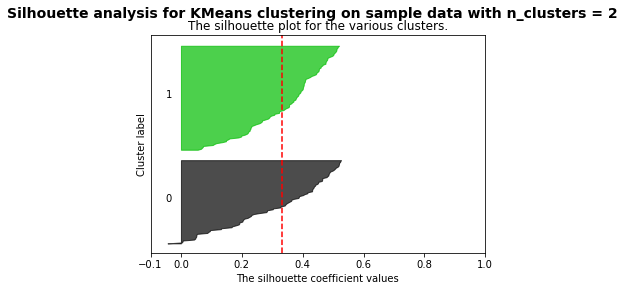

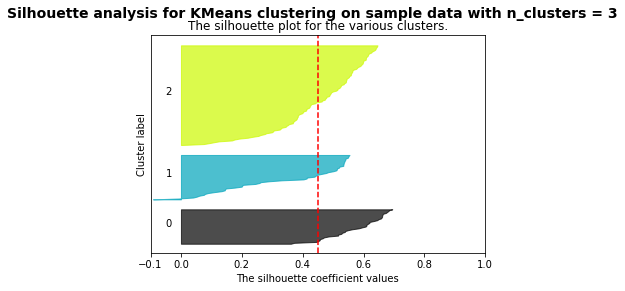

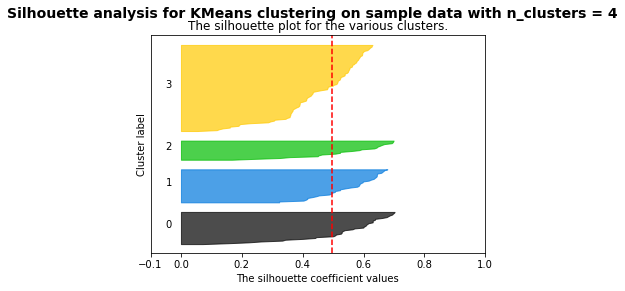

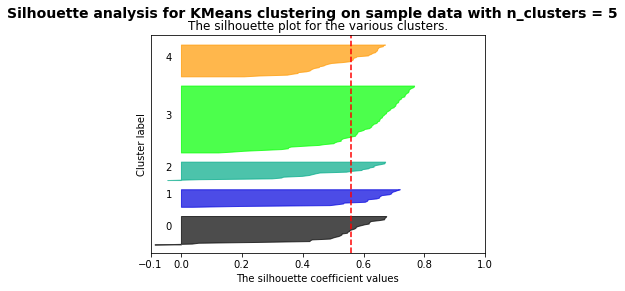

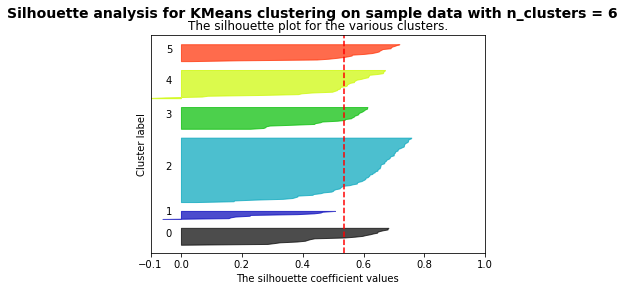

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
X=df_scaled[['Annual Income (k$)','Spending Score (1-100)']]
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1,1)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [44]:
Kmeans_model = KMeans(n_clusters=5)
Kmeans_model.fit(X)

KMeans(n_clusters=5)

In [45]:
cluster_centroid_3 = Kmeans_model.cluster_centers_
cluster_centroid_3

array([[0.08792846, 0.79962894],
       [0.09265859, 0.20319432],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.33029751, 0.49508692]])

In [46]:
labels_3 = Kmeans_model.labels_
labels_3

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

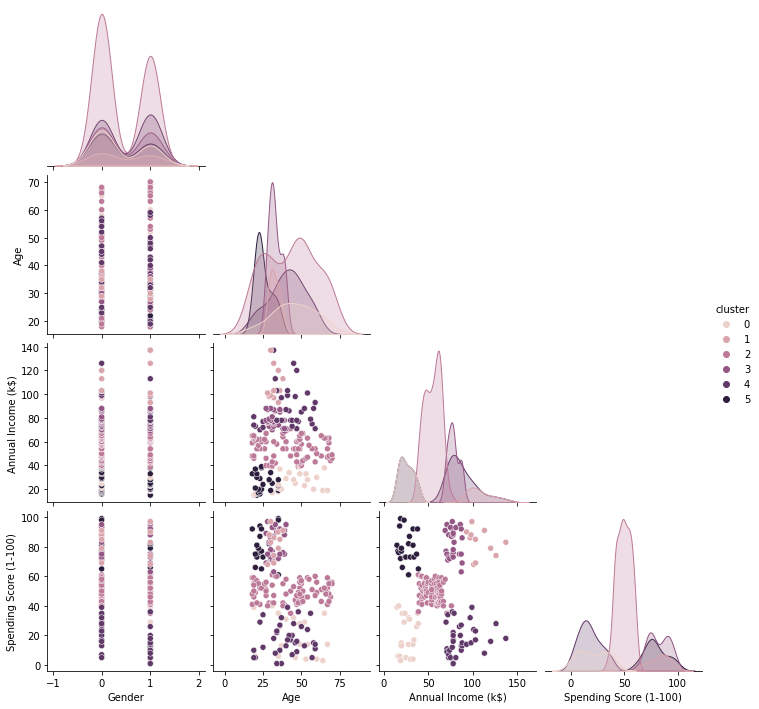

In [47]:
mall_data['cluster']=cluster_labels

sns.set_palette("bright")
sns.pairplot(mall_data,kind="scatter",hue="cluster",corner=True)
plt.show()

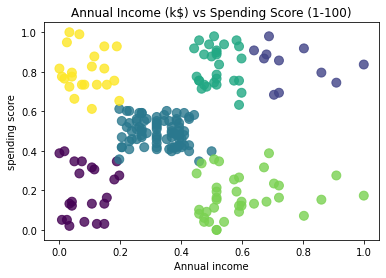

In [48]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=mall_data.cluster.astype(float),s=80,alpha=0.8)
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.show()

# AgglomerativeClustering

In [49]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [52]:
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.39090074716611595
For n_clusters = 3 The average silhouette_score is : 0.44796167261691394
For n_clusters = 4 The average silhouette_score is : 0.4976418539903167
For n_clusters = 5 The average silhouette_score is : 0.5582698727196419
For n_clusters = 6 The average silhouette_score is : 0.5296670434232814


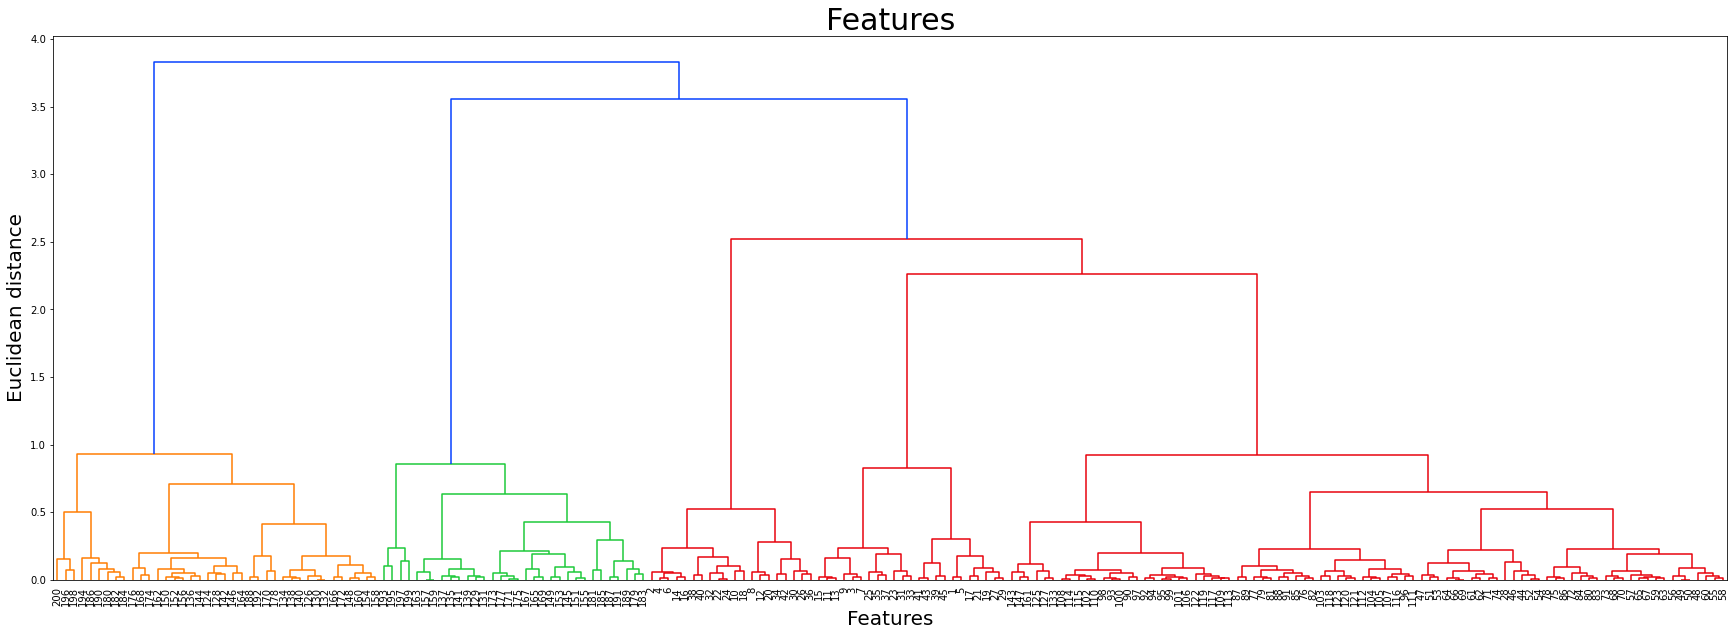

In [54]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=mall_data.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Features',fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

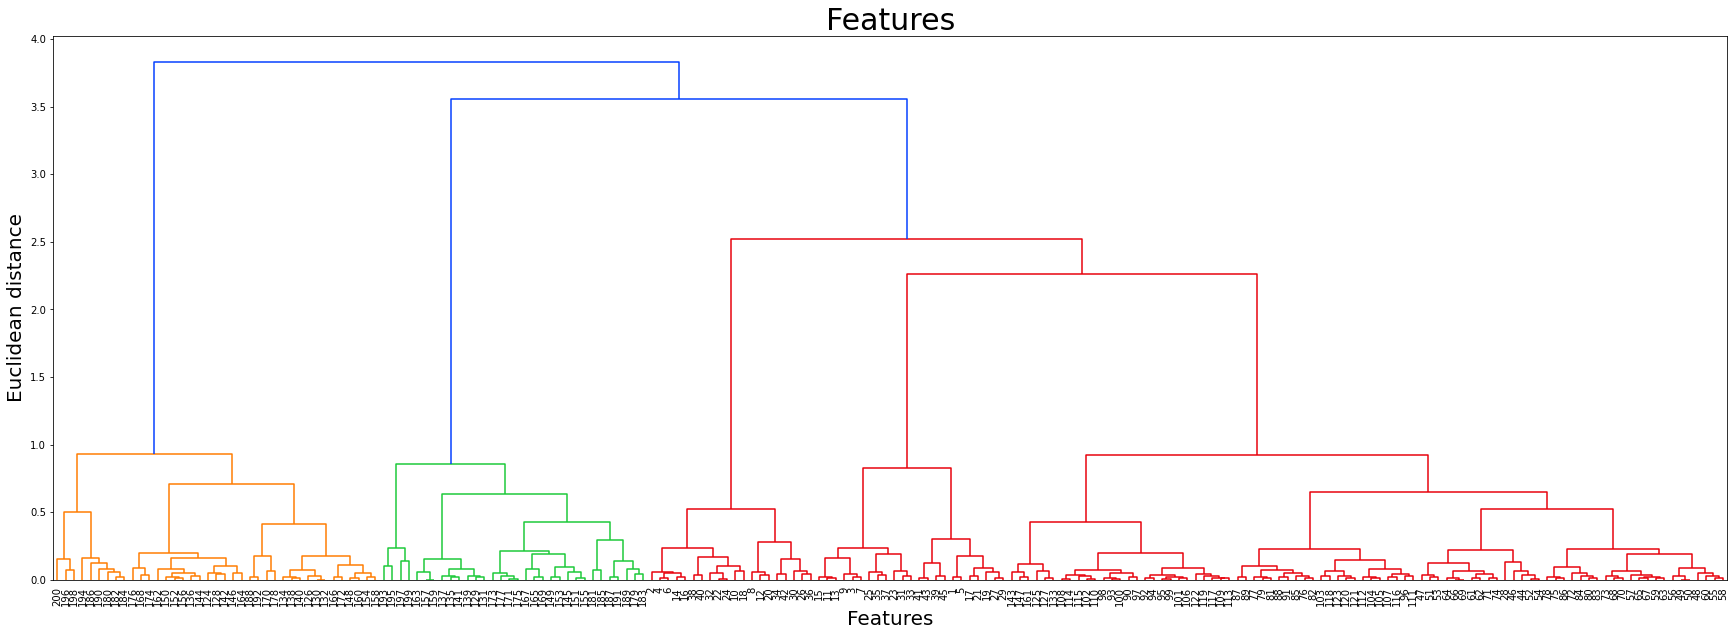

In [55]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=mall_data.index)
plt.axhline(y=6, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Features',fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [56]:
model=AgglomerativeClustering(n_clusters=5)

In [57]:
predict=model.fit_predict(X)
predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [58]:
mall_df=mall_data.copy()

In [60]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
mall_df['gender_encode']= preprocessing.LabelEncoder().fit_transform(mall_df.Gender)

In [62]:
mall_df['cluster_agg']=predict

In [63]:
mall_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,gender_encode,cluster_agg
CustomerID,,,,,,,
1,1,19,15,39,0,1,4
2,1,21,15,81,5,1,3
3,0,20,16,6,0,0,4
4,0,23,16,77,5,0,3
5,0,31,17,40,0,0,4
...,...,...,...,...,...,...,...
196,0,35,120,79,1,0,0
197,0,45,126,28,4,0,2
198,1,32,126,74,1,1,0


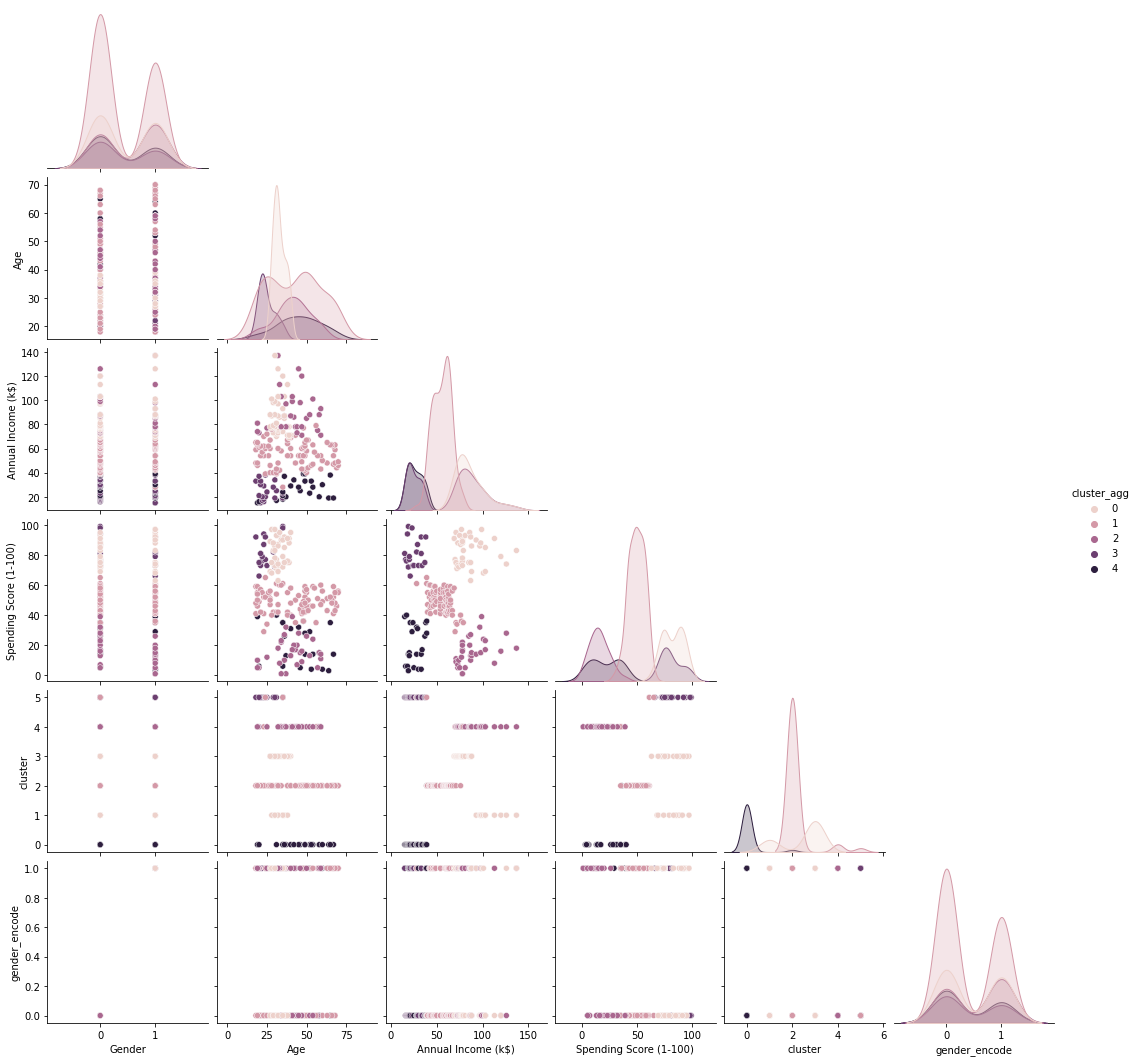

In [64]:
sns.pairplot(mall_df,kind='scatter',hue='cluster_agg',corner=True)

# Displaying the clusters and its features

In [65]:
mall_df[mall_df.cluster_agg==0].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,gender_encode,cluster_agg
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,0.461538,32.692308,86.538462,82.128205,2.435897,0.461538,0.0
std,0.505035,3.728650,16.312485,9.364489,0.911762,0.505035,0.0
min,0.000000,27.000000,69.000000,63.000000,1.000000,0.000000,0.0
25%,0.000000,30.000000,75.500000,74.500000,1.000000,0.000000,0.0
50%,0.000000,32.000000,79.000000,83.000000,3.000000,0.000000,0.0
75%,1.000000,35.500000,95.000000,90.000000,3.000000,1.000000,0.0
max,1.000000,40.000000,137.000000,97.000000,3.000000,1.000000,0.0


In [66]:
mall_df[mall_df.cluster_agg==1].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,gender_encode,cluster_agg
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,0.406977,42.395349,55.488372,49.267442,2.162791,0.406977,1.0
std,0.494152,16.319082,10.128288,7.350749,0.610891,0.494152,0.0
min,0.000000,18.000000,28.000000,29.000000,2.000000,0.000000,1.0
25%,0.000000,27.000000,48.000000,43.000000,2.000000,0.000000,1.0
50%,0.000000,45.500000,55.500000,49.500000,2.000000,0.000000,1.0
75%,1.000000,54.000000,63.000000,55.000000,2.000000,1.000000,1.0
max,1.000000,70.000000,79.000000,65.000000,5.000000,1.000000,1.0


In [67]:
mall_df[mall_df.cluster_agg==3].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,gender_encode,cluster_agg
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.0
mean,0.400000,24.850000,24.950000,81.000000,5.0,0.400000,3.0
std,0.502625,5.029126,7.287155,9.514532,0.0,0.502625,0.0
min,0.000000,18.000000,15.000000,66.000000,5.0,0.000000,3.0
25%,0.000000,21.000000,19.000000,73.000000,5.0,0.000000,3.0
50%,0.000000,23.000000,23.500000,78.000000,5.0,0.000000,3.0
75%,1.000000,29.250000,30.750000,88.250000,5.0,1.000000,3.0
max,1.000000,35.000000,38.000000,99.000000,5.0,1.000000,3.0


In [68]:
mall_df[mall_df.cluster_agg==4].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,gender_encode,cluster_agg
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,0.391304,45.217391,26.304348,20.913043,0.086957,0.391304,4.0
std,0.499011,13.228607,7.893811,13.017167,0.417029,0.499011,0.0
min,0.000000,19.000000,15.000000,3.000000,0.000000,0.000000,4.0
25%,0.000000,35.500000,19.500000,9.500000,0.000000,0.000000,4.0
50%,0.000000,46.000000,25.000000,17.000000,0.000000,0.000000,4.0
75%,1.000000,53.500000,33.000000,33.500000,0.000000,1.000000,4.0
max,1.000000,67.000000,39.000000,40.000000,2.000000,1.000000,4.0


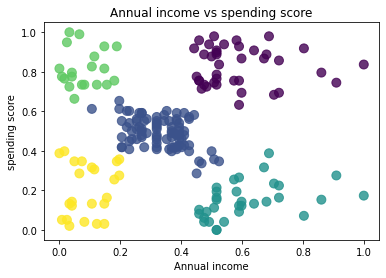

In [69]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=mall_df.cluster_agg.astype(float),s=80,alpha=0.8)
plt.title("Annual income vs spending score")
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.show()